In [1]:
import json
import os
import subprocess

import numpy as np
from pathlib import Path
import yaml
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import MaxNLocator
import lossmaps as lm
import xobjects as xo

import xtrack as xt
import xcoll as xc

import lossmaps as lm

No pytransport functionality
No pytransport functionality


# Load

In [2]:
path = '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/'

In [3]:
n_test = 'TEST_B2V_align_test_CRY6.0'
prefix_name =  'TEST_B2V_align_test_CRY5.0_15_'

In [4]:

test_list = (subprocess.check_output("find "+ path +" -maxdepth 1 -mindepth 1 -type d | grep " + prefix_name, shell=True)).decode('ascii').strip().splitlines()

In [5]:
test_list

['/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733']

In [6]:
    for test_name in test_list:

        n_jobs = int(subprocess.check_output("find "+ test_name +" -maxdepth 1 -mindepth 1 -type d | grep Job. | wc -l", shell=True))

        losses_json =[]

        for i in range(n_jobs):
            file_path = (subprocess.check_output("echo " + test_name + '/Job.' + str(i) + '/Outputdata/lossmap*.json', shell=True)).decode('ascii').strip()
            if os.path.exists(file_path):
                losses_json.append(file_path)

        n_jobs_verify  = len(losses_json)
        if n_jobs != n_jobs_verify:
            print("!!! Succesful Jobs: ", n_jobs_verify, '/', n_jobs, ' in file: ', test_name)

In [7]:
losses_json

['/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.0/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.1/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.2/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.3/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.4/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.5/Outputdata/lossmap_B2V.json',
 '/afs/cern.ch/work/c/cmaccani/xsuite_sim/twocryst_sim/Condor/TEST_B2V_align_test_CRY5.0_15__20231110-1733/Job.6/Outputdata/lossmap_B2V.json',

In [8]:
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B2V, machine=lm.Machine.LHC)

In [9]:
#ThisLM.load_data_json(json_files=losses_json)
ThisLM.load_data_json(json_files=losses_json)

Maximum inefficiency in the DS is 2.04e-05.


pymadx.Tfs.Load> normal file


(<Figure size 1440x864 with 3 Axes>,
 array([<Axes: xlabel='S [m]', ylabel='Norm. inefficiency [arb. unit]'>,
        <Axes: >,
        <Axes: xlabel='S [m]', ylabel='Norm. inefficiency [arb. unit]'>],
       dtype=object))

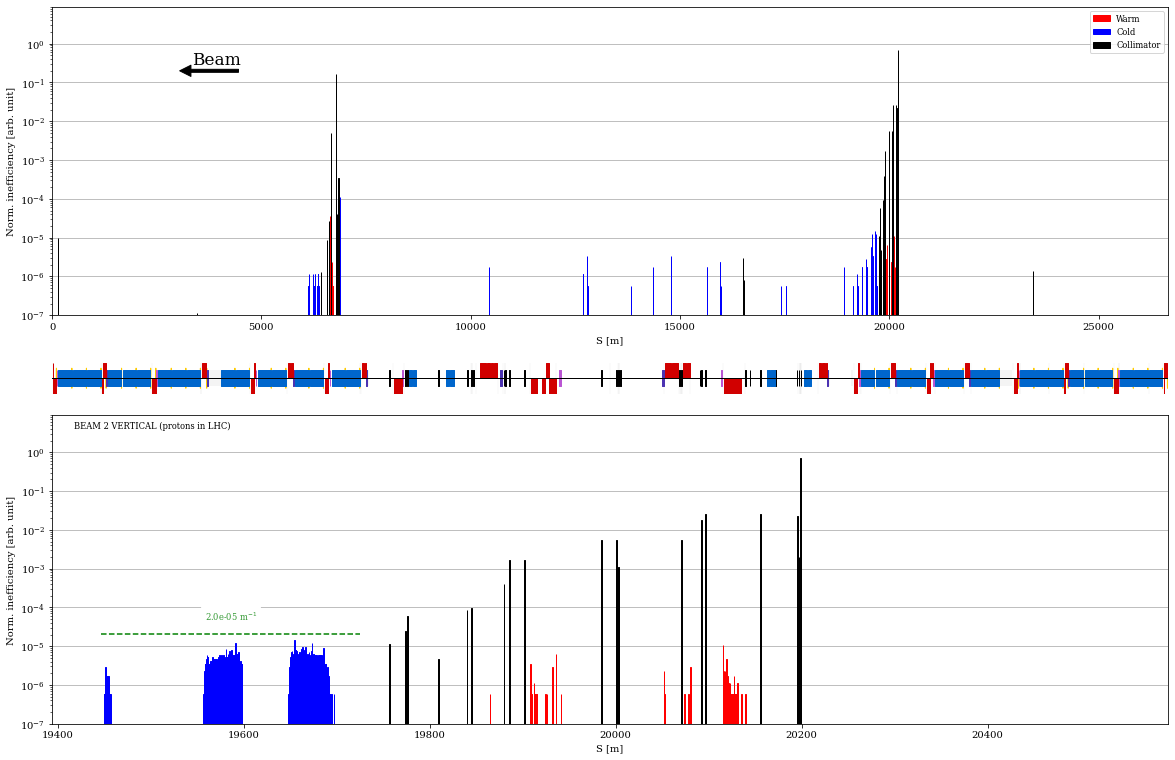

In [10]:
lm.plot_lossmap(ThisLM, zoom=True, layout="./input_files/layout_flat_top_b2.tfs",  outfile = "./Outputdata/TEST_False2.png")  #, outfile = "./Outputdata/Lossmap_outputs/"+outfile_name

In [11]:
lm.plot_lossmap_interactive(ThisLM, norm='total', layout="./input_files/layout_flat_top_b2.tfs")  #

Box(children=(Dropdown(description='norm', index=3, options=('none', 'max', 'coll_max', 'total'), value='total…

FigureWidget({
    'data': [{'base': 1e-17,
              'hovertemplate': 'S=%{x:.2f} m, value=%{y:1.2e}<br>%{hovertext}',
              'hovertext': array([ 166.,  167.,  168.,  169.,  170.,  171.,  172.,  173.,  174.,  175.,
                                   177.,  178.,  179.,  180.,  181.,  182.,  183.,  184.,  185.,  186.,
                                   187.,  188.,  189.,  190.,  191.,  192.,  193.,  194.,  195.,  196.,
                                   197.,  198.,  199.,  200.,  201.,  204.,  239.,  240.,  241.,  242.,
                                  1269., 1273., 1274., 1275., 1276., 1277., 1278., 1279., 1280., 1281.,
                                  1282., 1283., 1284., 1285., 1286., 1287., 1288., 1292., 1293., 1295.,
                                  1296., 1297., 1298., 1301., 1302., 1303., 1304., 1305., 1306., 1307.,
                                  1308., 1309., 1310., 1311., 1312., 1313., 1314., 1315., 1316., 1317.,
                                  1318., 131

In [12]:
losses_df = ThisLM._losses
losses_df[losses_df['name']=='tcla.a5l3.b2']

#'target.4l3.b2'

#loss_tcp = int(losses_df[losses_df['name']=='tcp.d6r7.b2']['losses'])

,s,name,losses_type,losses
162,6574.220794,tcla.a5l3.b2,Losses.COLL,152.0
